# 1. 单神经元分类问题

单神经元计算：

第一步，计算 z , z=wX+b1

第二步，通过激活函数计算a, a=σ(z)


以MNIST手写数字识别问题为例

MNIST 数据集来自美国国家标准与技术研究所, National Institute of Standards and Technology (NIST)

数据集由来自 250 个不同人手写的数字构成

其中 50% 是高中学生, 50% 来自人口普查局 (the Census Bureau) 的工作人员

# 2. 数据读取

利用网上的 MNIST 数据集(http://yann.lecun.com/exdb/mnist/)获取数据集压缩文件（切勿解压）：

train-images-idx3-ubyte.gz --- 6万张28x28大小的训练数字图像

train-labels-idx1-ubyte.gz --- 6万张训练图像的数字标记

t10k-images-idx3-ubyte.gz  --- 1万张28x28大小的测试数字图像

t10k-labels-idx1-ubyte.gz  --- 1万张测试图像的数字标记

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# 载入数据集
mnist = input_data.read_data_sets("../data/", one_hot=True)

# 显示数据集数量
print("训练集数量：", mnist.train.num_examples)
print("验证集数量：", mnist.validation.num_examples)
print("测试集数量：", mnist.test.num_examples)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ../data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ../data/t10k-images-idx3-ubyte.gz
Extracting ../data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
训练集数量： 55000
验证集数量： 5000
测试集数量： 10000


In [2]:
# 显示数据集大小
print("训练图像大小：", mnist.train.images.shape)
print("训练标签大小：", mnist.train.labels.shape)

训练图像大小： (55000, 784)
训练标签大小： (55000, 10)


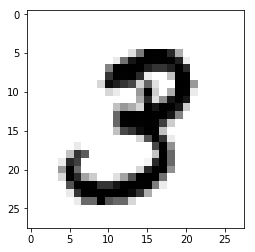

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [3]:
# 可视化图像
def plot_image(image):
    plt.imshow(image.reshape(28, 28), cmap='binary')
    plt.show()


# 可视化第二张训练图像
plot_image(mnist.train.images[1])

# 可视化第二张图像的标签
print(mnist.train.labels[1])

# 3. 构建模型

In [4]:
# 定义训练数据的占位符， x是784个像素点的特征值， y是10分类的标签值
x = tf.placeholder(tf.float32, [None, 784], name="X")
y = tf.placeholder(tf.float32, [None, 10], name="Y")

# 初始化w为shape=（784,10），服从标准差为0.01的随机正态分布的数
W = tf.Variable(tf.random_normal([784, 10], stddev=0.01), name="W")
# 初始化b为0
b = tf.Variable(tf.zeros([10]), name="b")

# 定义向前传播计算
forward = tf.matmul(x, W) + b

# 定义分类结果softmax分类
pred = tf.nn.softmax(forward)

# 定义损失函数
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(-tf.reduce_sum(y * tf.log(pred) + (1 - y) * tf.log(1 - pred), reduction_indices=1))

Instructions for updating:
Colocations handled automatically by placer.


# 4. 训练模型

In [5]:
train_epochs = 50  # 迭代次数
learning_rate = 0.01  # 学习率

# 梯度下降优化器 设置学习率和优化目标损失最小化
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)

# 定义预测类别匹配情况
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

# 定义准确率，将布尔值转化成浮点数，再求平均值
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess = tf.Session()  # 建立会话
init = tf.global_variables_initializer()  # 变量初始化
sess.run(init)

# 每个批次的大小，每次放入的大小，每次放入 100张图片 以矩阵的方式
batch_size = 100

# 计算一共有多少个批次，数量整除大小训练出有多少批次
n_batch = mnist.train.num_examples // batch_size

# 批次迭代训练
for epoch in range(train_epochs):
    for batch in range(n_batch):
        xs, ys = mnist.train.next_batch(batch_size)
        sess.run(optimizer, feed_dict={x: xs, y: ys})
    # 批次训练完成之后，使用验证数据计算误差与准确率
    loss, acc = sess.run([loss_function, accuracy], feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
    # 显示训练信息
    print("Train Epoch", '%02d' % (epoch + 1), "Loss=", '{:.9f}'.format(loss), "Accuracy=", "{:.4f}".format(acc))

Instructions for updating:
Use tf.cast instead.
Train Epoch 01 Loss= 0.753277957 Accuracy= 0.8508
Train Epoch 02 Loss= 0.573337674 Accuracy= 0.8724
Train Epoch 03 Loss= 0.500200272 Accuracy= 0.8778
Train Epoch 04 Loss= 0.458181739 Accuracy= 0.8860
Train Epoch 05 Loss= 0.431485593 Accuracy= 0.8904
Train Epoch 06 Loss= 0.411359131 Accuracy= 0.8944
Train Epoch 07 Loss= 0.396364838 Accuracy= 0.8954
Train Epoch 08 Loss= 0.384499013 Accuracy= 0.8982
Train Epoch 09 Loss= 0.375186175 Accuracy= 0.9000
Train Epoch 10 Loss= 0.366730094 Accuracy= 0.9002
Train Epoch 11 Loss= 0.359705120 Accuracy= 0.9028
Train Epoch 12 Loss= 0.353614569 Accuracy= 0.9036
Train Epoch 13 Loss= 0.348535538 Accuracy= 0.9060
Train Epoch 14 Loss= 0.343835711 Accuracy= 0.9078
Train Epoch 15 Loss= 0.339743346 Accuracy= 0.9096
Train Epoch 16 Loss= 0.336159915 Accuracy= 0.9096
Train Epoch 17 Loss= 0.332731605 Accuracy= 0.9112
Train Epoch 18 Loss= 0.329623938 Accuracy= 0.9108
Train Epoch 19 Loss= 0.326796710 Accuracy= 0.9112
Tr

# 5. 评估模型

In [6]:
# 测试集上评估模型预测的准确率
accu_test = sess.run(accuracy, feed_dict={x: mnist.test.images, y: mnist.test.labels})
print("Test Accuracy = ", accu_test)

# 验证集上评估模型预测的准确率
accu_validation = sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels})
print("Validation Accuracy = ", accu_validation)

# 训练集上评估模型预测的准确率
accu_train = sess.run(accuracy, feed_dict={x: mnist.train.images, y: mnist.train.labels})
print("Train Accuracy = ", accu_train)

Test Accuracy =  0.9191
Validation Accuracy =  0.9214
Train Accuracy =  0.91596365


# 6. 模型预测

In [7]:
# 转换pred预测结果独热编码格式为数字0-9
prediction_result = sess.run(tf.argmax(pred, 1), feed_dict={x: mnist.test.images})

# 查看第100-109张测试图片的预测结果
print(prediction_result[100:110])

[6 0 5 4 9 9 2 1 9 4]


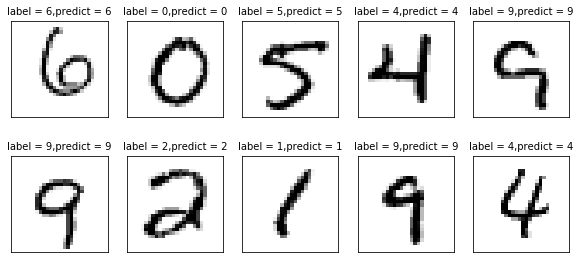

In [8]:
# 定义比对可视化函数
def plot_images_labels_prediction(images,  # 图像列表
                                  labels,  # 标签列表
                                  prediction,  # 预测值列表
                                  index,  # 开始显示的索引
                                  num=5):  # 缺省一次显示5张
    fig = plt.gcf()  # 获取当前图表，get current figure
    fig.set_size_inches(10, 12)  # 1英寸等于2.54cm

    if num > 25:  # 最多显示25张图片
        num = 25

    for i in range(0, num):
        ax = plt.subplot(5, 5, i + 1)  # 获取当前要处理的图片
        ax.imshow(np.reshape(images[index], (28, 28)), cmap='binary')  # 显示第index个图像
        title = 'label = ' + str(np.argmax(labels[index]))  # 显示标签的标题
        if len(prediction) > 0:  # 如果有预测结果的话，添加显示预测的标题
            title += ',predict = ' + str(prediction[index])
        ax.set_title(title, fontsize=10)  # 显示图上的标题
        # 不显示坐标轴
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()


# 可视化第100-109张测试图片的预测结果对比
plot_images_labels_prediction(mnist.test.images,
                              mnist.test.labels,
                              prediction_result,
                              100, 10)
